# Assignment 1: Visualization Design
In this assignment, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. You should in theory be ready to explain the contribution of every pixel in the display. You are free to use any graphics or charting tool you please - including drafting it by hand. However, you may find it most instructive to create the chart from scratch using a graphics API of your choice.

Your task is to design a static (i.e., single image) visualization that you believe effectively communicates the data and provide a short write-up (no more than 4 paragraphs) describing your design. Start by choosing a question you'd like your visualization to answer. Design your visualization to answer that question, and use the question as the title of your graphic.

While you must use the data set given, note that you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

## Lets start by exploring the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# define some colors based on Tableaus color scheme
blue = (0 , 107/256, 164/256)
grey = [x/256 for x in (171, 171, 171)]
black = [x/256 for x in (89, 89, 89)]

Read in the data

In [9]:
data = pd.read_csv('census2000.csv')
data[:5]

,Sex,Year,Age,People
0,1,1900,0,4619544
1,1,2000,0,9735380
2,1,1900,5,4465783
3,1,2000,5,10552146
4,1,1900,10,4057669


In [3]:
tab1900 = data[data['Year'] == 1900]
tab2000 = data[data['Year'] == 2000]

tab1900_men = tab1900[tab1900['Sex'] == 1]
tab1900_women = tab1900[tab1900['Sex'] == 2]

tab2000_men = tab2000[tab2000['Sex'] == 1]
tab2000_women = tab2000[tab2000['Sex'] == 2]

## Looking at the raw data, the number of men and women as a function of age in each century

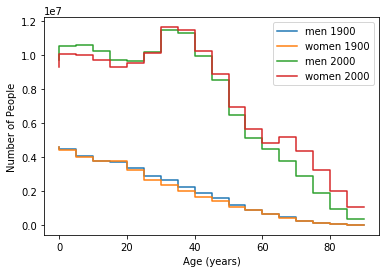

In [4]:
plt.step(tab1900_men['Age'].values, tab1900_men['People'].values, label='men 1900')
plt.step(tab1900_women['Age'].values, tab1900_women['People'].values, label='women 1900')
plt.step(tab2000_men['Age'].values, tab2000_men['People'].values, label='men 2000')
plt.step(tab2000_women['Age'].values, tab2000_women['People'].values, label='women 2000')
plt.xlabel('Age (years)')
plt.ylabel('Number of People')
plt.legend()
plt.show()

## Lets look at the ratio of men to women to normalize against population growth

In [5]:
age = tab1900_men['Age'].values
p1m = tab1900_men['People'].values
p1w = tab1900_women['People'].values
p2m = tab2000_men['People'].values
p2w = tab2000_women['People'].values
m2w1900 = p1m/p1w
m2w2000 = p2m/p2w

In [6]:
def make_pretty():
    ax = fig.gca()
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    # Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  
    plt.grid(which='major', axis='both', linestyle='dotted', alpha=0.5)

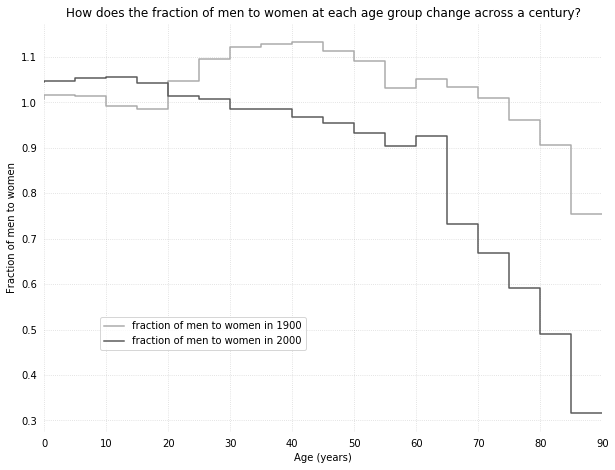

In [11]:
import matplotlib as mpl
#mpl.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,10/1.33))
plt.title("How does the fraction of men to women at each age group change across a century?", fontsize=12)
plt.step(age, m2w1900, color=grey, label='fraction of men to women in 1900')
plt.step(age, m2w2000, color=black, label='fraction of men to women in 2000')
make_pretty()
plt.xlabel('Age (years)')
plt.ylabel('Fraction of men to women')
plt.xlim(0.01, 90)    
plt.legend(loc=(0.1,0.2))

plt.savefig('m2w_fraction.png', dpi=200)
plt.show()


Looking at the data, I felt the most interesting question was the relative number of men to women at each age group and how that has changed over a century. Though, this is rather simplistic, I believe it to be the most interesting feature in the data. Taking the ratio of men to women at each century we can see the answer to the relevent question. The most striking feature is the relative increase in women to men in the modern era. 

By taking the ratio, we hide the overall population growth, which I felt was obvious and not interesting. This scaling highlights the "bump" in middle aged men in 1900 and the faster decline of men to women in later life. 

As for the design choices, I chose to use grey scale colors based on Tableaus color blind safe color scheme. Also, in the name of inclusion, I have used sans-serif fonts as these are purported to be better for the dyslexic. I felt the plot boundaries are uneccesary and chose to add a grid to guide the eye in seeing he different age groups. I added the legend to the lower left to avoid the uneccesarry white space. I also cut the limits of the y-axis for the same reason. 

## Another interesting statistic is the ratio of the male/female ratio

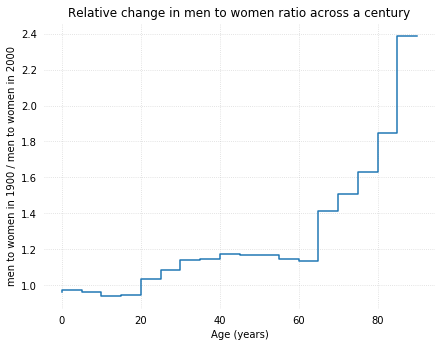

In [8]:
fig = plt.figure(figsize=(7,7/1.33))
plt.title("Relative change in men to women ratio across a century")
plt.step(age, m2w1900/m2w2000)
plt.xlabel('Age (years)')
plt.ylabel('men to women in 1900 / men to women in 2000')
make_pretty()
plt.show()